In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

file_loc = "C:/Users/Bowen/Desktop/TSLA.csv"
df=pd.read_csv(file_loc)
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [2]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [3]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output;1 days time lag
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [4]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 9s 87ms/step - loss: 0.0478
Epoch 2/100
24/24 [==============================] - 2s 97ms/step - loss: 0.0168
Epoch 3/100
24/24 [==============================] - 2s 85ms/step - loss: 0.0144
Epoch 4/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0138
Epoch 5/100
24/24 [==============================] - 2s 83ms/step - loss: 0.0124
Epoch 6/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0115
Epoch 7/100
24/24 [==============================] - 2s 85ms/step - loss: 0.0113
Epoch 8/100
24/24 [==============================] - 2s 97ms/step - loss: 0.0109
Epoch 9/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0104
Epoch 10/100
24/24 [==============================] - 2s 96ms/step - loss: 0.0123
Epoch 11/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0098
Epoch 12/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0093
Epoch 13/100
24/24 [=====

In [5]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(459, 60, 1)


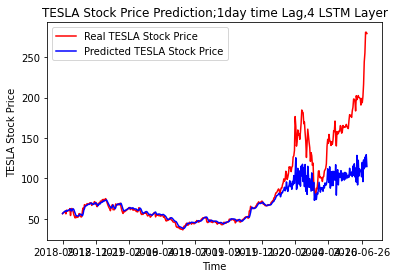

In [6]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction;1day time Lag,4 LSTM Layer')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [7]:
#change to 7 Days Time Lags
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output;7 days time lag
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i-7, 0])
    y_train.append(training_set_scaled[i-7:i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [8]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 8s 71ms/step - loss: 0.0685
Epoch 2/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0183
Epoch 3/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0142
Epoch 4/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0133
Epoch 5/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0164
Epoch 6/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0143
Epoch 7/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0126
Epoch 8/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0130
Epoch 9/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0125
Epoch 10/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0140
Epoch 11/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0140
Epoch 12/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0121
Epoch 13/100
24/24 [=====

In [9]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i-7, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(459, 53, 1)


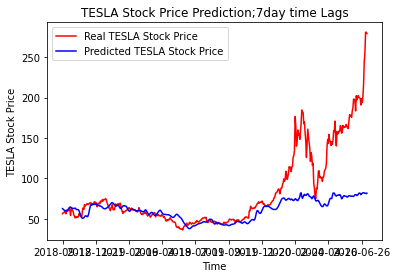

In [10]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction;7day time Lags')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [11]:
#change to 14 Days Time Lags
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output，14 days time Lags
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i-14, 0])
    y_train.append(training_set_scaled[i-14:i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [12]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 11s 66ms/step - loss: 0.0590
Epoch 2/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0175
Epoch 3/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0167
Epoch 4/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0167
Epoch 5/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0155
Epoch 6/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0153
Epoch 7/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0145
Epoch 8/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0145
Epoch 9/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0141
Epoch 10/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0147
Epoch 11/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0140
Epoch 12/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0133
Epoch 13/100
24/24 [====

In [13]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i-14, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(459, 46, 1)


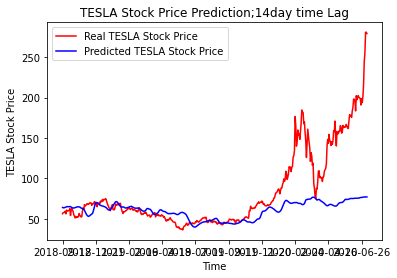

In [14]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction;14day time Lag')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [15]:
#Try Six LSTM layer
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output;1 days time lag
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [16]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a forth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 12s 119ms/step - loss: 0.0650
Epoch 2/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0187
Epoch 3/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0184
Epoch 4/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0166
Epoch 5/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0155
Epoch 6/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0170
Epoch 7/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0150
Epoch 8/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0140
Epoch 9/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0155
Epoch 10/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0125
Epoch 11/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0139
Epoch 12/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0124
Epoch 13/100

In [17]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


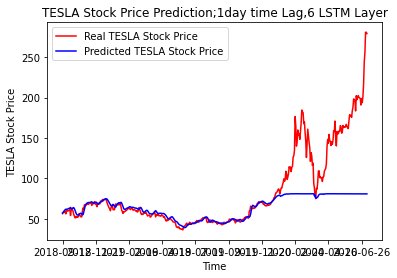

In [18]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction;1day time Lag,6 LSTM Layer')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [19]:
#Try three LSTM layer
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output;1 days time lag
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [20]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 59ms/step - loss: 0.0805
Epoch 2/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0173
Epoch 3/100
24/24 [==============================] - 1s 58ms/step - loss: 0.0120
Epoch 4/100
24/24 [==============================] - 1s 58ms/step - loss: 0.0098
Epoch 5/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0108
Epoch 6/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0097
Epoch 7/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0097
Epoch 8/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0102
Epoch 9/100
24/24 [==============================] - 1s 58ms/step - loss: 0.0107
Epoch 10/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0091
Epoch 11/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0088
Epoch 12/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0085
Epoch 13/100
24/24 [=====

In [21]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(459, 60, 1)


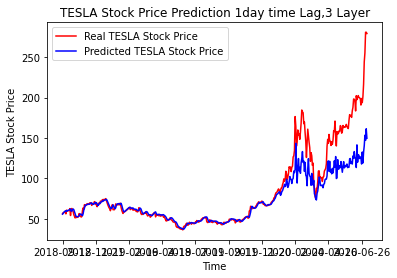

In [22]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction 1day time Lag,3 Layer')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [25]:
file_loc = "C:/Users/Bowen/Desktop/Pred1.csv"
df=pd.read_csv(file_loc)
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1314,2020/9/25,NaN,NaN,NaN,NaN,NaN,NaN
1315,2020/9/28,NaN,NaN,NaN,NaN,NaN,NaN
1316,2020/9/29,NaN,NaN,NaN,NaN,NaN,NaN
1317,2020/9/30,NaN,NaN,NaN,NaN,NaN,NaN
1318,2020/10/1,NaN,NaN,NaN,NaN,NaN,NaN


(519, 60, 1)


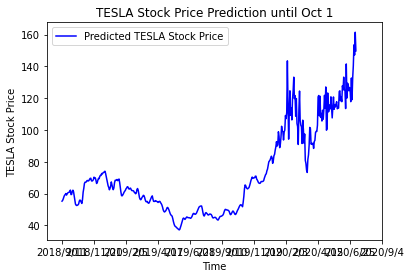

In [26]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 579):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (519, 60, 1)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,519,50))
plt.title('TESLA Stock Price Prediction until Oct 1')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()